In [166]:
# import libraries

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [167]:
def_df = pd.read_csv('ml.csv')
def_df = def_df.drop(['Unnamed: 0', 'Time Label', 'Nodes Label'], axis = 1)
def_df = def_df.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS'])

init_df = pd.read_csv('results_1_new.csv')
init_df = init_df.filter(['NAME', 'RANDOM SEED', 'TIME FIRST ROUND', 'TIME ROOT END'])

merged_df = def_df.merge(init_df, on = ['NAME', 'RANDOM SEED'], how = 'left')
merged_df['FIRST ROUND'] = merged_df['TIME FIRST ROUND'] + merged_df['TIME W/O CUTS']
merged_df['ROOT END'] = merged_df['TIME ROOT END'] + merged_df['TIME W/O CUTS']
merged_df

merged_df = merged_df.groupby('NAME').mean()
merged_df = merged_df.reset_index()
merged_df = merged_df.drop(['RANDOM SEED'], axis =1)

In [168]:
time_1 = []
time_2 = []
time_3 = []

for index, row in merged_df.iterrows():
    if row['TIME W/ CUTS'] > row['TIME W/O CUTS']:
        time_1.append(0)
    elif row['TIME W/ CUTS'] <= row['TIME W/O CUTS']:
        time_1.append(1)

    if row['TIME W/ CUTS'] > row['FIRST ROUND']:
        time_2.append(0)
    elif row['TIME W/ CUTS'] <= row['FIRST ROUND']:
        time_2.append(1)
        
    if row['TIME W/ CUTS'] > row['ROOT END']:
        time_3.append(0)
    elif row['TIME W/ CUTS'] <= row['ROOT END']:
        time_3.append(1)

merged_df['Time 1'] = time_1
merged_df['Time 2'] = time_2
merged_df['Time 3'] = time_3

merged_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3
0,10teams.mps.gz,10.997772,12.386720,1.350119,3.312776,13.736838,15.699496,1,1,1
1,22433.mps.gz,2.535930,0.650582,0.172883,2.828100,0.823464,3.478681,0,0,1
2,23588.mps.gz,5.527370,2.399748,0.140688,1.972278,2.540436,4.372027,0,0,0
3,30_70_45_05_100.mps.gz,282.653795,240.079782,18.567687,162.244480,258.647469,402.324263,0,0,1
4,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0
5,30_70_45_095_98.mps.gz,76.557754,26.326404,13.898364,69.983411,40.224768,96.309816,0,0,1
6,30n20b8.mps.gz,152.430964,147.722575,19.472141,131.638816,167.194716,279.361391,0,1,1
7,CMS750_4.mps.gz,18000.492354,15883.387148,4.036673,18000.288052,15887.423821,33883.675200,0,0,1
8,Test3.mps.gz,7.735743,18.267015,3.492119,6.232050,21.759134,24.499065,1,1,1
9,ab51-40-100.mps.gz,717.364914,1387.340706,0.000000,0.000000,1387.340706,1387.340706,1,1,1


In [169]:
df_initial = pd.read_csv('initial_plot.csv', index_col=[0])
df_initial = df_initial.filter(['NAME', 'PLabel RF'])
df_initial = df_initial.sort_values(by = ['NAME'], ascending = True)
df_initial.rename(columns ={'PLabel RF':'PLabel 1'}, inplace=True)
df_initial

,NAME,PLabel 1
235,10teams.mps.gz,1
363,22433.mps.gz,0
130,23588.mps.gz,0
198,30_70_45_05_100.mps.gz,0
422,30_70_45_095_100.mps.gz,0
3,30_70_45_095_98.mps.gz,0
392,30n20b8.mps.gz,1
7,CMS750_4.mps.gz,0
37,Test3.mps.gz,1
331,ab51-40-100.mps.gz,1


In [170]:
merged_df = merged_df.merge(df_initial, on = ['NAME'], how = 'left')
merged_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3,PLabel 1
0,10teams.mps.gz,10.997772,12.386720,1.350119,3.312776,13.736838,15.699496,1,1,1,1
1,22433.mps.gz,2.535930,0.650582,0.172883,2.828100,0.823464,3.478681,0,0,1,0
2,23588.mps.gz,5.527370,2.399748,0.140688,1.972278,2.540436,4.372027,0,0,0,0
3,30_70_45_05_100.mps.gz,282.653795,240.079782,18.567687,162.244480,258.647469,402.324263,0,0,1,0
4,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0,0
5,30_70_45_095_98.mps.gz,76.557754,26.326404,13.898364,69.983411,40.224768,96.309816,0,0,1,0
6,30n20b8.mps.gz,152.430964,147.722575,19.472141,131.638816,167.194716,279.361391,0,1,1,1
7,CMS750_4.mps.gz,18000.492354,15883.387148,4.036673,18000.288052,15887.423821,33883.675200,0,0,1,0
8,Test3.mps.gz,7.735743,18.267015,3.492119,6.232050,21.759134,24.499065,1,1,1,1
9,ab51-40-100.mps.gz,717.364914,1387.340706,0.000000,0.000000,1387.340706,1387.340706,1,1,1,1


In [171]:
df_first = pd.read_csv('first_round_plot.csv', index_col=[0])
df_first = df_first.filter(['NAME', 'PLabel NN'])
df_first = df_first.sort_values(by = ['NAME'], ascending = True)
df_first.rename(columns ={'PLabel NN':'PLabel 2'}, inplace=True)
df_first

,NAME,PLabel 2
235,10teams.mps.gz,1
363,22433.mps.gz,0
130,23588.mps.gz,0
198,30_70_45_05_100.mps.gz,1
422,30_70_45_095_100.mps.gz,1
3,30_70_45_095_98.mps.gz,0
392,30n20b8.mps.gz,0
7,CMS750_4.mps.gz,0
37,Test3.mps.gz,0
331,ab51-40-100.mps.gz,1


In [172]:
merged_df = merged_df.merge(df_first, on = ['NAME'], how = 'left')
merged_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2
0,10teams.mps.gz,10.997772,12.386720,1.350119,3.312776,13.736838,15.699496,1,1,1,1,1
1,22433.mps.gz,2.535930,0.650582,0.172883,2.828100,0.823464,3.478681,0,0,1,0,0
2,23588.mps.gz,5.527370,2.399748,0.140688,1.972278,2.540436,4.372027,0,0,0,0,0
3,30_70_45_05_100.mps.gz,282.653795,240.079782,18.567687,162.244480,258.647469,402.324263,0,0,1,0,1
4,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0,0,1
5,30_70_45_095_98.mps.gz,76.557754,26.326404,13.898364,69.983411,40.224768,96.309816,0,0,1,0,0
6,30n20b8.mps.gz,152.430964,147.722575,19.472141,131.638816,167.194716,279.361391,0,1,1,1,0
7,CMS750_4.mps.gz,18000.492354,15883.387148,4.036673,18000.288052,15887.423821,33883.675200,0,0,1,0,0
8,Test3.mps.gz,7.735743,18.267015,3.492119,6.232050,21.759134,24.499065,1,1,1,1,0
9,ab51-40-100.mps.gz,717.364914,1387.340706,0.000000,0.000000,1387.340706,1387.340706,1,1,1,1,1


In [173]:
df_end = pd.read_csv('end_plot.csv', index_col=[0])
df_end = df_end.filter(['NAME', 'PLabel RF'])
df_end = df_end.sort_values(by = ['NAME'], ascending = True)
df_end.rename(columns ={'PLabel RF':'PLabel 3'}, inplace=True)
df_end

,NAME,PLabel 3
235,10teams.mps.gz,1
363,22433.mps.gz,1
130,23588.mps.gz,0
198,30_70_45_05_100.mps.gz,1
422,30_70_45_095_100.mps.gz,1
3,30_70_45_095_98.mps.gz,1
392,30n20b8.mps.gz,1
7,CMS750_4.mps.gz,1
37,Test3.mps.gz,1
331,ab51-40-100.mps.gz,1


In [174]:
merged_df = merged_df.merge(df_end, on = ['NAME'], how = 'left')
merged_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2,PLabel 3
0,10teams.mps.gz,10.997772,12.386720,1.350119,3.312776,13.736838,15.699496,1,1,1,1,1,1
1,22433.mps.gz,2.535930,0.650582,0.172883,2.828100,0.823464,3.478681,0,0,1,0,0,1
2,23588.mps.gz,5.527370,2.399748,0.140688,1.972278,2.540436,4.372027,0,0,0,0,0,0
3,30_70_45_05_100.mps.gz,282.653795,240.079782,18.567687,162.244480,258.647469,402.324263,0,0,1,0,1,1
4,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0,0,1,1
5,30_70_45_095_98.mps.gz,76.557754,26.326404,13.898364,69.983411,40.224768,96.309816,0,0,1,0,0,1
6,30n20b8.mps.gz,152.430964,147.722575,19.472141,131.638816,167.194716,279.361391,0,1,1,1,0,1
7,CMS750_4.mps.gz,18000.492354,15883.387148,4.036673,18000.288052,15887.423821,33883.675200,0,0,1,0,0,1
8,Test3.mps.gz,7.735743,18.267015,3.492119,6.232050,21.759134,24.499065,1,1,1,1,0,1
9,ab51-40-100.mps.gz,717.364914,1387.340706,0.000000,0.000000,1387.340706,1387.340706,1,1,1,1,1,1


In [186]:
# Default
print(len(merged_df[merged_df['Time 1']==0]))
print(len(merged_df[merged_df['Time 1']==1]))

194
232


In [187]:
# Initial

print(len(merged_df[(merged_df['Time 1']==1) & (merged_df['PLabel 1']==1)]))
print(len(merged_df[(merged_df['Time 1']==1) & (merged_df['PLabel 1']==0)]))
print(len(merged_df[(merged_df['Time 1']==0) & (merged_df['PLabel 1']==1)]))
print(len(merged_df[(merged_df['Time 1']==0) & (merged_df['PLabel 1']==0)]))

217
15
18
176


In [188]:
# First Round

print(len(merged_df[(merged_df['Time 2']==1) & (merged_df['PLabel 2']==1)]))
print(len(merged_df[(merged_df['Time 2']==1) & (merged_df['PLabel 2']==0)]))
print(len(merged_df[(merged_df['Time 2']==0) & (merged_df['PLabel 2']==1)]))
print(len(merged_df[(merged_df['Time 2']==0) & (merged_df['PLabel 2']==0)]))

231
33
56
106


In [189]:
# Root End

print(len(merged_df[(merged_df['Time 3']==1) & (merged_df['PLabel 3']==1)]))
print(len(merged_df[(merged_df['Time 3']==1) & (merged_df['PLabel 3']==0)]))
print(len(merged_df[(merged_df['Time 3']==0) & (merged_df['PLabel 3']==1)]))
print(len(merged_df[(merged_df['Time 3']==0) & (merged_df['PLabel 3']==0)]))

295
5
25
101


In [190]:
d = {'Step': ['Default', 'Initial', 'Round 1', 'End of Root'], 'L1T1': [232,217,231,295], 'L1T0': [194,15,33,5], 'L0T1': [0,18,56,25], 'L0T0': [0,176,106,101]}
df = pd.DataFrame(data=d)
df

,Step,L1T1,L1T0,L0T1,L0T0
0,Default,232,194,0,0
1,Initial,217,15,18,176
2,Round 1,231,33,56,106
3,End of Root,295,5,25,101


<AxesSubplot:xlabel='Step'>

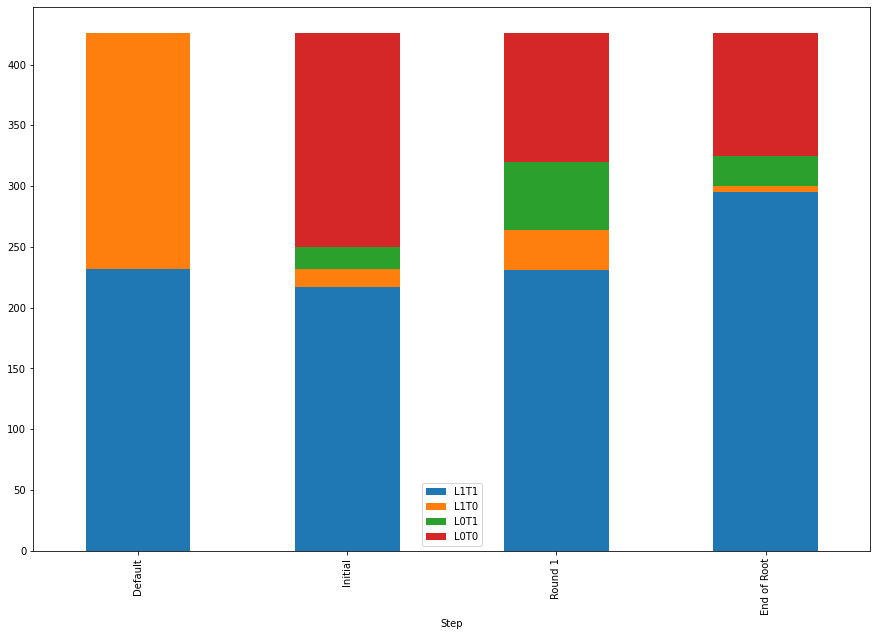

In [194]:
df.plot.bar(x='Step', stacked=True, figsize=(15, 10))